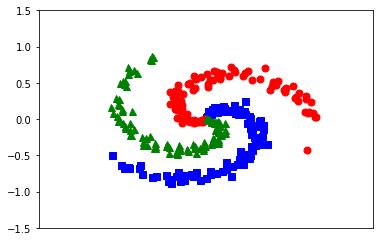

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 

N = 100
d0 = 2
C = 3 
X = np.zeros((d0, N*C))
y = np.zeros(N*C, dtype='uint8')

for j in range(C):
    ix = range(j*N, (j+1)*N)
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2
    X[:, ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j

plt.plot(X[0, :N], X[1, :N], 'bs', markersize=7)
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize=7)
plt.plot(X[0, 2*N:3*N], X[1, 2*N:3*N], 'g^', markersize=7)

plt.axis([-1.5, 1.5, -1.5, 1.5])
# plt.xlim([-1.5, 1.5])
# plt.ylim([-1.5, 1.5])

cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_xaxis().set_ticks([])

plt.savefig('EX.png', bbox_inches='tight', dpi=600)
plt.show()

In [8]:
def softmax(V):
    eV = np.exp(V-np.max(V, axis=0, keepdims=True))
    Z = eV/eV.sum(axis=0)
    return Z

from scipy.sparse import coo_matrix

def convert_labels(y, C=3):
    Y = coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape=(C, len(y))).toarray()
    return Y

def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]


In [11]:
d0 = 2
d1 = h = 100
d2 = C = 3

W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))

W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y)
N = X.shape[1]
eta = 1
for i in range(10000):
    Z1 = W1.T.dot(X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = W2.T.dot(A1) + b2
    Yhat = softmax(Z2)
    
    if i % 1000 == 0:
        loss = cost(Y, Yhat)
        print('iter %d : %f' %(i, loss))
    
    E2 = (Yhat-Y)/N
    JW2 = np.dot(A1, E2.T)
    Jb2 = E2.sum(axis=1, keepdims=True)
    E1 = np.dot(W2, E2)
    E1[Z1<=0] = 0
    JW1 = np.dot(X, E1.T)
    Jb1 = E1.sum(axis=1, keepdims=True)
    
    W1 -= eta*JW1
    b1 -= eta*Jb1
    W2 -= eta*JW2
    b2 -= eta*Jb2


iter 0 : 1.098639
iter 1000 : 0.130559
iter 2000 : 0.052379
iter 3000 : 0.037298
iter 4000 : 0.030825
iter 5000 : 0.027162
iter 6000 : 0.024691
iter 7000 : 0.022902
iter 8000 : 0.021553
iter 9000 : 0.020494


In [19]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
# print(Z2.shape)
y_predict = np.argmax(Z2, axis=0)
print('training accuracy %f %%.' %(100*np.mean(y_predict == y)))

training accuracy 99.333333 %.
